## <b><font color=red>ASSIGNMEN #1:</b></font> Comparision of LSTM and LSTM(2) with SimpleRNN, SimpleRNN(2), GRU, GRU(2) for prediction of high price of MSFT on the NASDAQ stock exchange


<p><b><font color=red>Tasks:</p></b>
<p>High Price -> Comparison of LSTM, LSTM(2) with SimpleRNN, SimpleRNN(2), GRU, GRU(2)</p>
<p>Plot -> Predict the normalized data; plot on the actual scale</p>

<b><p><font color=green>Assumption:</p></b>
<p>x_step=50</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Input,GRU, LSTM

In [ ]:
def convert_data(data, x_step):
  x_data = []
  y_data = []
  for i in range(len(data) - x_step):
    x_data.append(data[i:i+x_step])
    y_data.append(data[i+x_step])
  return np.array(x_data), np.array(y_data)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

ms=yf.download('MSFT',start='2012-01-01',end='2025-09-19')

/tmp/ipython-input-2574150342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ms=yf.download('MSFT',start='2012-01-01',end='2025-09-19')
[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.preprocessing import MinMaxScaler

train =ms.loc[:"2024"].High.values
test =ms.loc["2025":].High.values
scaler = MinMaxScaler()
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.transform(test)

x_step=50

X_train,y_train = convert_data(train_scaled,x_step)
X_test,y_test = convert_data(test_scaled,x_step)

# <font color=red>Stage I: </font> LSTM

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0102
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 4.8239e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.9708e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.3375e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 2.3154e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 2.0075e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.8752e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.5636e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.7727e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.4762e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.4594e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.2735e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.3881e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.

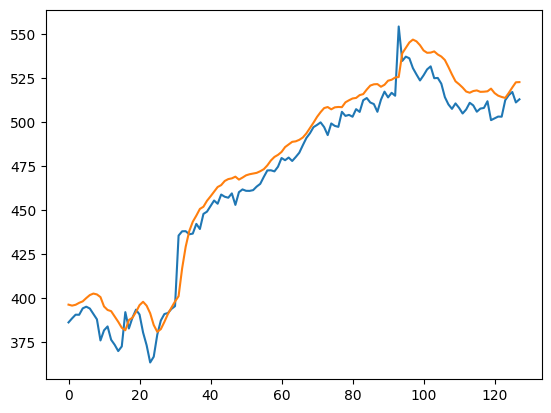

In [ ]:
input_shape=(x_step,1)

model=Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MSE with single LSTM: 0.000665


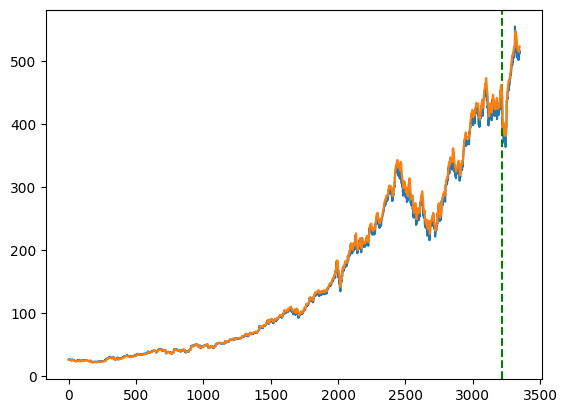

In [ ]:
from sklearn.metrics import mean_squared_error

test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g", linestyle="--")
plt.plot(scaler.inverse_transform((predicted)))

nn_mse = mean_squared_error(y_test, test_predicted)

print(f"MSE with single LSTM: {nn_mse:.6f}")

# <font color=red>Stage II: </font> LSTM(2)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0077
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 9.9924e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 6.9654e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 6.2883e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 4.7385e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 4.1855e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - loss: 4.1221e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 3.7033e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 3.2057e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 3.1634e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 2.7519e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 2.7418e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 2.4032e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step

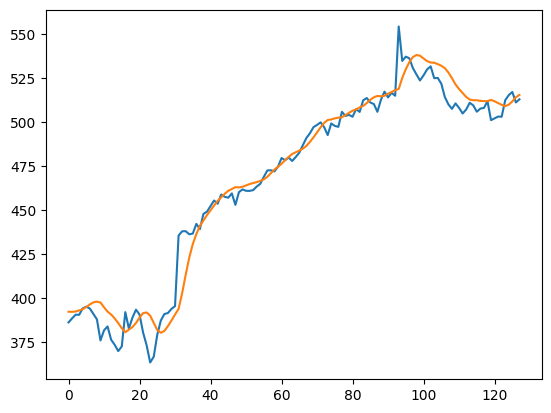

In [ ]:
model=Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
MSE with double LSTM: 0.000819


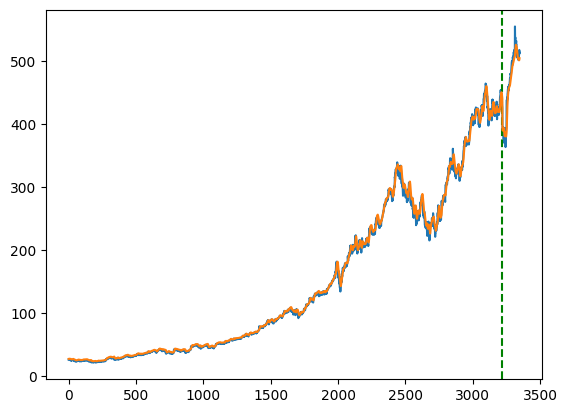

In [ ]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g", linestyle="--")
plt.plot(scaler.inverse_transform((predicted)))

nn_mse = mean_squared_error(y_test, test_predicted)

print(f"MSE with double LSTM: {nn_mse:.6f}")

# <font color=red>Stage III: </font> LSTM(3)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 0.0119
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0016
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0011
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 0.0011
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 7.7520e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 6.9494e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 5.2997e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 5.7594e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 4.5176e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 3.9679e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - loss: 4.2958e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 4.0123e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 4.0225e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - loss: 

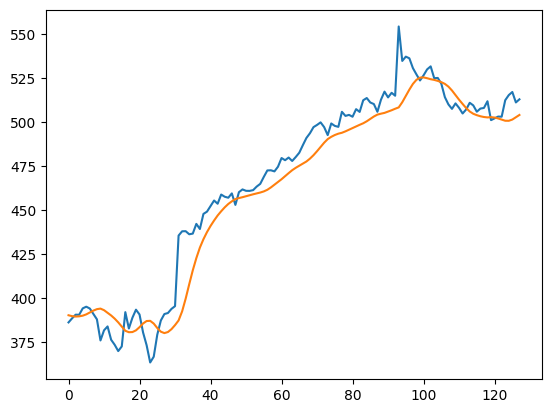

In [ ]:
model=Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
MSE with triple LSTM: 0.000819


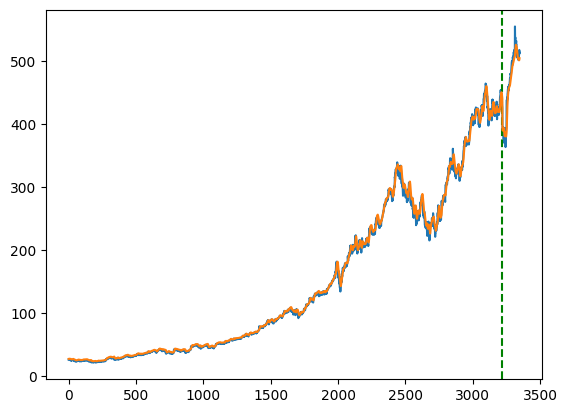

In [ ]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g", linestyle="--")
plt.plot(scaler.inverse_transform((predicted)))

nn_mse = mean_squared_error(y_test, test_predicted)

print(f"MSE with triple LSTM: {nn_mse:.6f}")

<font color=red><p>MSE with single LSTM: 0.000665
<font color=red><p>MSE with double LSTM: 0.000489
<p>MSE with triple LSTM: 0.000819</font>
<font color=green><p>MSE with single SimpleRNN: 0.000288
<p>MSE with double SimpleRNN: 0.001308
<p>MSE with single GRU: 0.000465
<p>MSE with double GRU: 0.000516</font>

## <b><font color=red>ASSIGNMEN #2:</b></font> Glove embedding to determine the closest word to a given negative word and two positive words

In [ ]:
import numpy as np

In [ ]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-09-20 09:18:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-20 09:18:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-20 09:18:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def similarity(u,v):
  return np.squeeze(cosine_similarity(u.reshape(1,-1),v.reshape(1,-1)))

In [ ]:
embedding_matrix = {}
vocabulary = []

# Load GloVe embeddings from file
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vocabulary.append(word)
        vector = np.asarray(values[1:], dtype='float32')
        embedding_matrix[word] = vector

print(len(embedding_matrix))
print(len(vocabulary))

400000
400000


<p><font color=red> Possitive words: wealthy and healthy
<p><font color=blue> Negative word: deprived

In [ ]:
positive1=embedding_matrix['wealthy']
positive2=embedding_matrix['healthy']

negative1=embedding_matrix['deprived']


In [27]:
# Find most similar words
similarities = {}
for word in vocabulary:
    if word not in ['wealthy', 'healthy', 'deprived']:
        try:
            word_vector = embedding_matrix[word].reshape(1, -1)
            similarity = cosine_similarity(positive1.reshape(1, -1), positive2.reshape(1, -1))[0][0]
            similarities[word] = abs(similarity-cosine_similarity(negative1.reshape(1, -1), word_vector)[0][0])
        except KeyError:
            continue

In [32]:
# Get top results
top_n = 10
top_words = sorted(similarities.items(), key=lambda x: x[1], reverse=False)[:top_n]

print(f"Top similar words to 'deprived' when compared to this couple of words: 'wealthy' and 'healthy':")
for i, (word, sim) in enumerate(top_words, 1):
    print(f"{i}. {word}: {sim:.4f}")

Top similar words to 'deprived' when compared to this couple of words: 'wealthy' and 'healthy':
1. addicted: 0.0000
2. landless: 0.0001
3. mitigated: 0.0001
4. stay: 0.0001
5. owed: 0.0001
6. vast: 0.0001
7. ugandans: 0.0001
8. nervous: 0.0001
9. required: 0.0002
10. consume: 0.0002
